In [1]:
%%capture
from featureeng import preprocessing

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import gc
import scipy.stats

import matplotlib.pyplot as plt
%matplotlib inline

## Load Dataset

In [3]:
# Load the raw data
df = pd.read_csv("data/ratings.csv", encoding="ISO-8859-1")
# df = df[:20]
# Input- & Output-Variables
texts = df["Sentence"].values 
y1mos = df["MOS_Complexity"].values
y1std = df["Std_Complexity"].values
y2mos = df["MOS_Understandability"].values
y2std = df["Std_Understandability"].values
y3mos = df["MOS_Lexical_difficulty"].values
y3std = df["Std_Lexical_difficulty"].values
# free memory
del df
gc.collect()

4

## Feature Engineering

In [4]:
feats1, feats2, feats3, feats4, feats5, feats6 = preprocessing(texts)

In [5]:
xinputs = np.hstack([feats1, feats2, feats3, feats4, feats5, feats6])
xinputs.shape

(1000, 522)

## Load Model

In [6]:
model = tf.keras.models.load_model(
    "best-model-370c-1-1", compile=False)

2022-06-12 13:21:14.231759: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Inference

In [7]:
y_pred = model.predict(xinputs)

In [8]:
ylikert1 = tf.argmax(y_pred['clf1'], axis=-1) + 1
ylikert2 = tf.argmax(y_pred['clf2'], axis=-1) + 1
ylikert3 = tf.argmax(y_pred['clf3'], axis=-1) + 1

In [9]:
yscore1 = y_pred['mos'][:, 0]
yscore2 = y_pred['mos'][:, 1]
yscore3 = y_pred['mos'][:, 2]

### (1) Complexity

SpearmanrResult(correlation=0.606613359397831, pvalue=1.5253547444321807e-101)

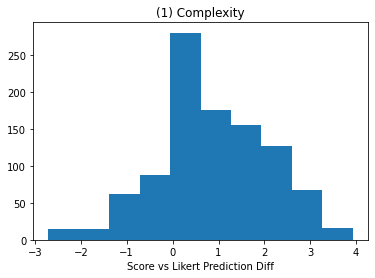

In [10]:
plt.hist(yscore1 - tf.cast(ylikert1, float));
plt.title("(1) Complexity");
plt.xlabel("Score vs Likert Prediction Diff");
scipy.stats.spearmanr(yscore1, tf.cast(ylikert1, float))

SpearmanrResult(correlation=0.5978086988113187, pvalue=6.247353212626497e-98)

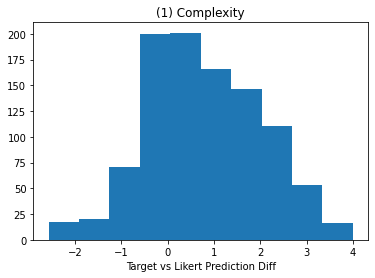

In [11]:
plt.hist(y1mos - tf.cast(ylikert1, float));
plt.title("(1) Complexity");
plt.xlabel("Target vs Likert Prediction Diff");
scipy.stats.spearmanr(y1mos, tf.cast(ylikert1, float))

SpearmanrResult(correlation=0.9936282220995695, pvalue=0.0)

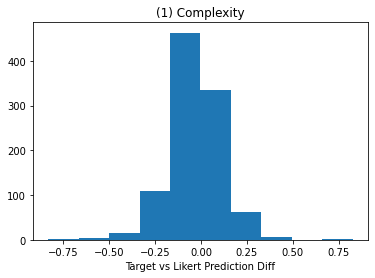

In [12]:
plt.hist(y1mos - yscore1);
plt.title("(1) Complexity");
plt.xlabel("Target vs Likert Prediction Diff");
scipy.stats.spearmanr(y1mos, yscore1)

### (2) Understandability

SpearmanrResult(correlation=0.629881198376321, pvalue=1.1759830071739188e-111)

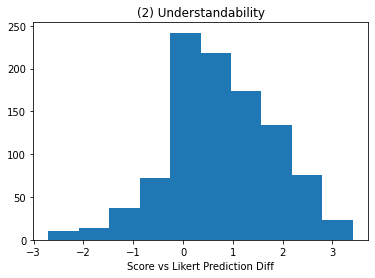

In [13]:
plt.hist(yscore2 - tf.cast(ylikert2, float));
plt.title("(2) Understandability");
plt.xlabel("Score vs Likert Prediction Diff");
scipy.stats.spearmanr(yscore2, tf.cast(ylikert2, float))

SpearmanrResult(correlation=0.6287444005693038, pvalue=3.842184952802558e-111)

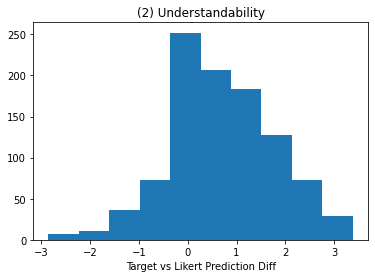

In [14]:
plt.hist(y2mos - tf.cast(ylikert2, float));
plt.title("(2) Understandability");
plt.xlabel("Target vs Likert Prediction Diff");
scipy.stats.spearmanr(y2mos, tf.cast(ylikert2, float))

SpearmanrResult(correlation=0.9887083861865423, pvalue=0.0)

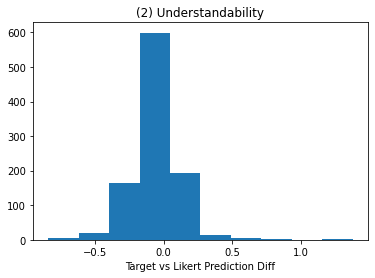

In [15]:
plt.hist(y2mos - yscore2);
plt.title("(2) Understandability");
plt.xlabel("Target vs Likert Prediction Diff");
scipy.stats.spearmanr(y2mos, yscore2)

### (3) Lexical Difficulty

SpearmanrResult(correlation=0.7719656210240143, pvalue=1.3668719515597334e-198)

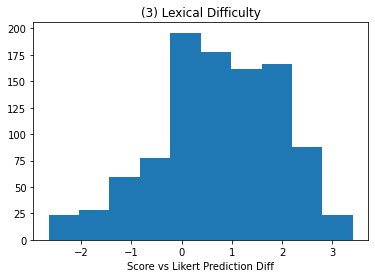

In [16]:
plt.hist(yscore3 - tf.cast(ylikert3, float));
plt.title("(3) Lexical Difficulty");
plt.xlabel("Score vs Likert Prediction Diff");
scipy.stats.spearmanr(yscore3, tf.cast(ylikert3, float))

SpearmanrResult(correlation=0.7674313193359015, pvalue=7.078120923743176e-195)

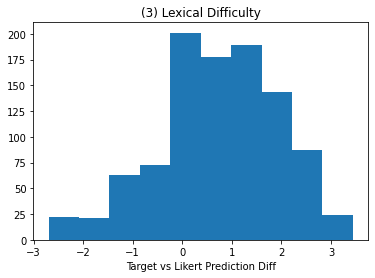

In [17]:
plt.hist(y3mos - tf.cast(ylikert3, float));
plt.title("(3) Lexical Difficulty");
plt.xlabel("Target vs Likert Prediction Diff");
scipy.stats.spearmanr(y3mos, tf.cast(ylikert3, float))

SpearmanrResult(correlation=0.994242852329556, pvalue=0.0)

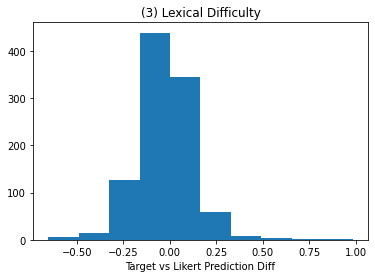

In [18]:
plt.hist(y3mos - yscore3);
plt.title("(3) Lexical Difficulty");
plt.xlabel("Target vs Likert Prediction Diff");
scipy.stats.spearmanr(y3mos, yscore3)

### Correlations

In [22]:
np.corrcoef(np.c_[y1mos, y2mos, y3mos], rowvar=False)

array([[1.        , 0.89598348, 0.90518689],
       [0.89598348, 1.        , 0.93461015],
       [0.90518689, 0.93461015, 1.        ]])

In [23]:
np.corrcoef(np.c_[yscore1, yscore2, yscore3], rowvar=False)

array([[1.        , 0.8985984 , 0.90813378],
       [0.8985984 , 1.        , 0.93350992],
       [0.90813378, 0.93350992, 1.        ]])